In [3]:
from sklearn.model_selection import GridSearchCV# for tuning parameter
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [6]:
dataset = pd.read_csv('bike share train.csv')
dataset.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [7]:
dataset.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

As we can see, datetime's type is object. We should convert it to datetime.

In [8]:
dataset.datetime = pd.to_datetime(dataset.datetime)

In [9]:
dataset.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

We have now been able to Convert the data types  to datetime

In [10]:
dataset['year'] = dataset['datetime'].dt.year
dataset['month'] = dataset['datetime'].dt.month
dataset['day'] = dataset['datetime'].dt.day
dataset['hour'] = dataset['datetime'].dt.hour
dataset['dayofweek'] = dataset['datetime']. dt.week

In [11]:
dataset.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,52


In [12]:
dataset["hour"] = [t.hour for t in pd.DatetimeIndex(dataset.datetime)]
dataset["day"] = [t.dayofweek for t in pd.DatetimeIndex(dataset.datetime)]
dataset["month"] = [t.month for t in pd.DatetimeIndex(dataset.datetime)]
dataset['year'] = [t.year for t in pd.DatetimeIndex(dataset.datetime)]
dataset['year'] = dataset['year'].map({2011:0, 2012:1})
dataset.head(4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5,0,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0,1,5,1,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0,1,5,2,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0,1,5,3,52


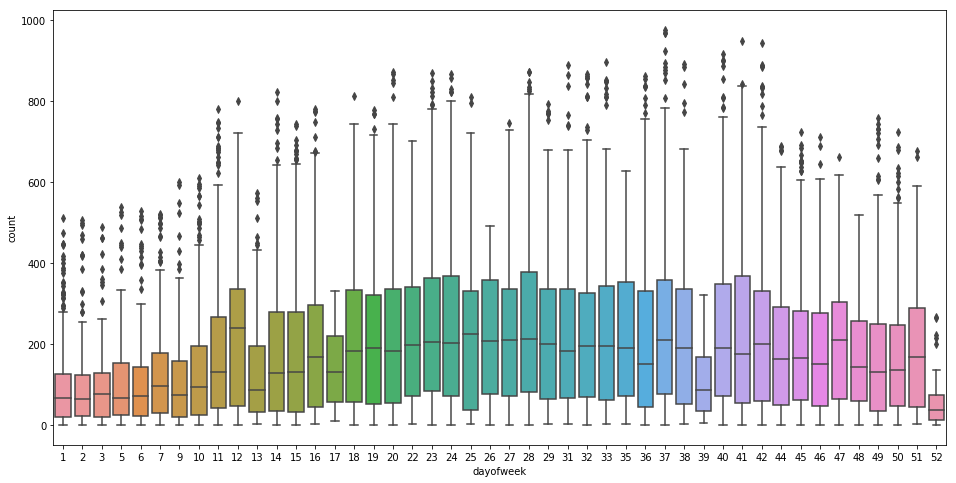

In [13]:
plt.figure(figsize=(16,8))
sns.boxplot(x='dayofweek',y='count', data=dataset)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


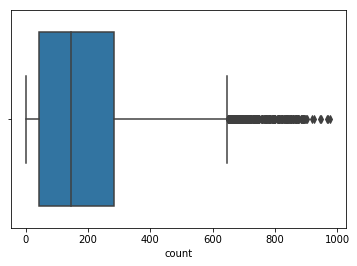

In [7]:
sns.boxplot(dataset['count'])
plt.show()

In [9]:
dataset['count']=dataset['count'].apply(lambda x:np.sqrt(x))
dataset['count']=dataset['count'].apply(lambda x:np.sqrt(x))

We cannot think of any strong evidence to get rid of outlier data. As per Chebychev's rule, 3 std. deviations account for 99% of data. Using this approach, we filter out the rest of the data.

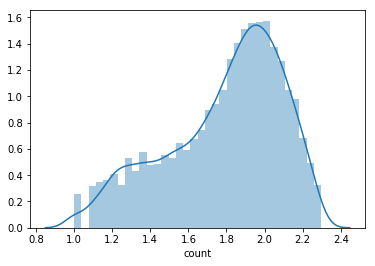

In [10]:
cnt=dataset['count'].values
q99=np.percentile(cnt,[99])


dataset=dataset[dataset['count']<q99[0]]
sns.distplot(dataset['count'])
plt.show()

#### Univariate analysis of all variables Categorical data--> Season, Holiday, WorkingDay, Weather

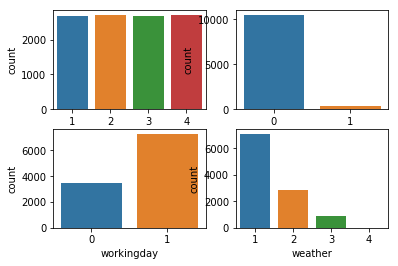

In [11]:
cat_names=['season', 'holiday', 'workingday', 'weather']

i=0
for name in cat_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.countplot(name,data=dataset) 
    
plt.show()

#### Univariate analysis for continuous data

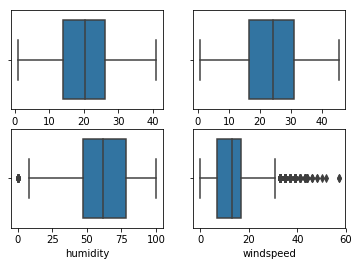

In [12]:
cont_names=['temp','atemp','humidity','windspeed']

        
#sns.boxplot(dataset['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=dataset) 
    
plt.show()


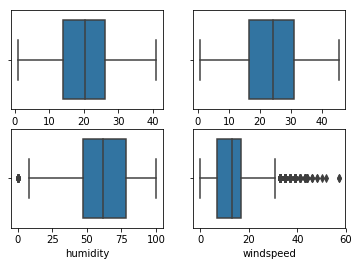

In [13]:
cont_names=['temp','atemp','humidity','windspeed']

        
#sns.boxplot(dataset['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=dataset) 
    
plt.show()


Some of the inferences that can be made:

Holiday and working day look somewhat correlated. Can one of them be removed to avoid multi-collinearity?Let's wait until we calculate thier correlation value

Not much can be inferred from season data. Majority of the data fall under 1 and 2, which is clear skies mist/cloudy.

Temp, Atemp, humidity look normally distributed. However, windspeed has a lot of outliers which will be analysed further.


doing a brief time-series analysis to see if there's any improvement in count over a period of time

moving average to be calculated for a period of 3/4 months as that is the no of months in one season

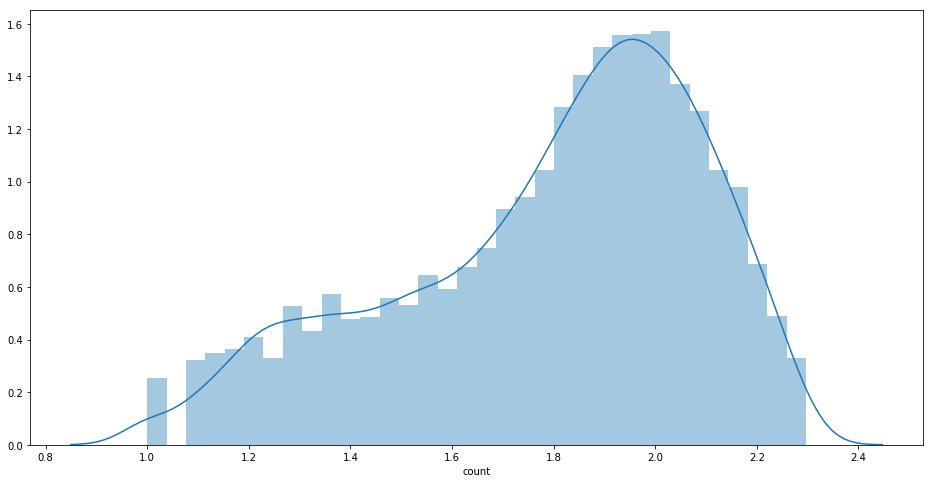

In [14]:
plt.figure(figsize=(16,8))
sns.distplot(dataset['count'])
plt.show()

As we can see from above graph. This is positively(right) skewed data.Now we will look the box plot and outliers value.

(array([3473.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7304.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

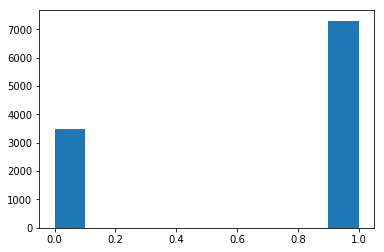

In [15]:
plt.hist(x='workingday', data=dataset)

## Detecting and Handling Outliers

#### Box plot use the IQR method for finding display data and outliers.

#### Wikipedia Definition

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

We will clear the outliers values.
Okay, let's check!

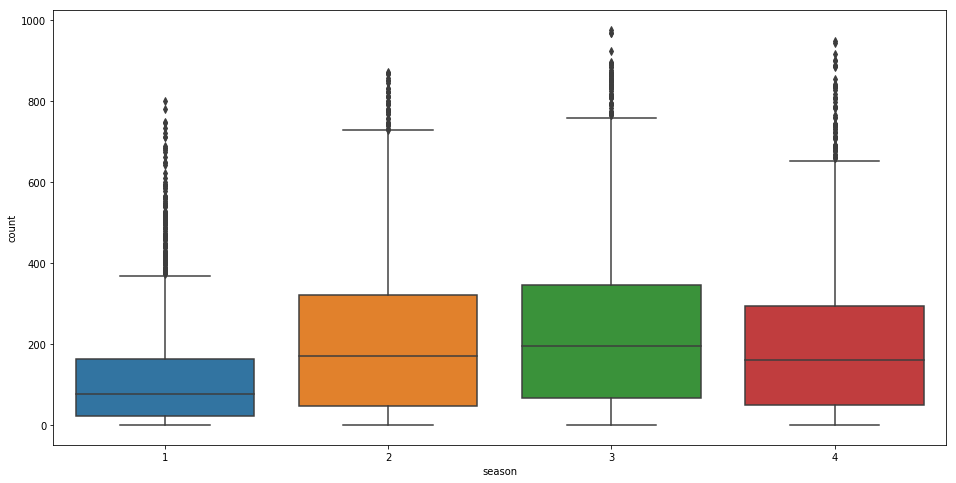

In [14]:
plt.figure(figsize=(16,8))
sns.boxplot(x='season', y='count', data=dataset)

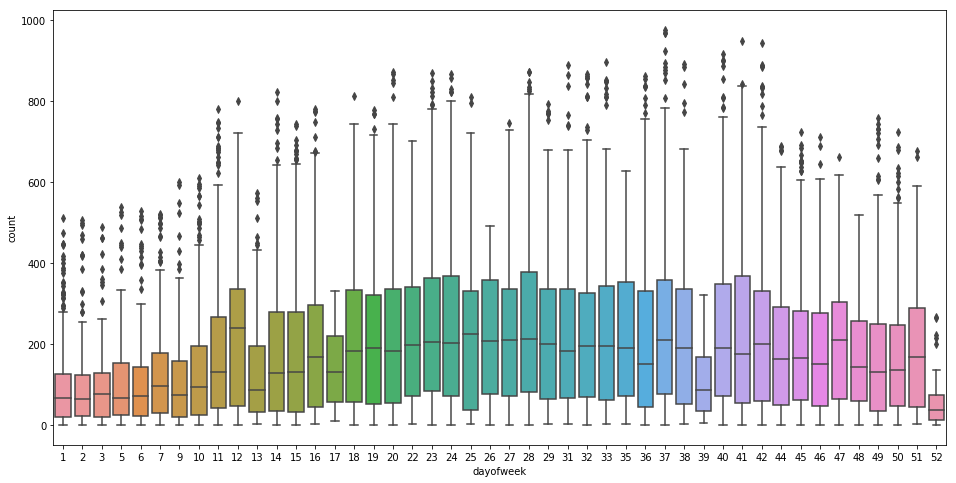

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(x='dayofweek',y='count', data=dataset)

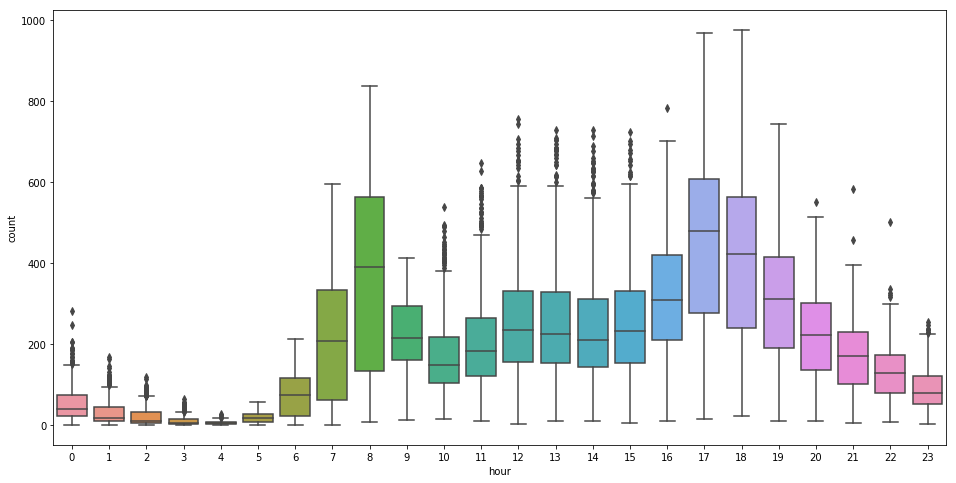

In [16]:
plt.figure(figsize=(16,8))
sns.boxplot(x='hour',y='count', data=dataset)

We can say that people prefer the morning and evening times for renting bike

(array([  82.,  248.,  301.,  337.,  358.,  449.,  740., 1189.,  987.,
         664.]),
 array([1.        , 1.12966384, 1.25932768, 1.38899152, 1.51865536,
        1.64831919, 1.77798303, 1.90764687, 2.03731071, 2.16697455,
        2.29663839]),
 <a list of 10 Patch objects>)

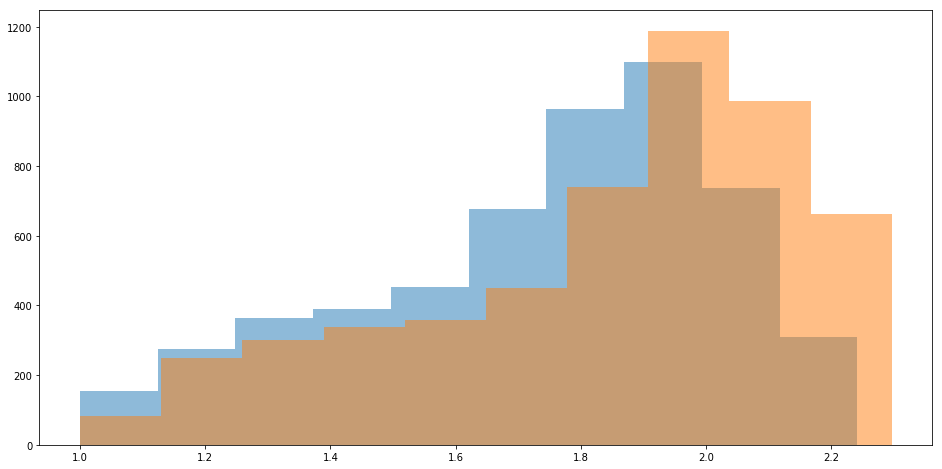

In [33]:
plt.figure(figsize=(16,8))
plt.hist(dataset['count'][dataset['year'] == 2011], alpha=0.5, label='2011')
plt.hist(dataset['count'][dataset['year'] == 2012], alpha=0.5, label='2012')

Rented more bike in 2012 than 2011.

#### Now, let's find the outliers

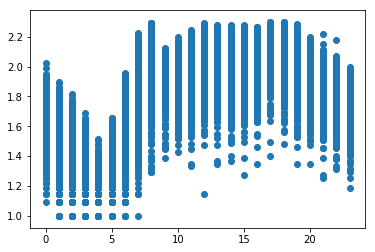

In [34]:
plt.scatter(dataset['hour'], dataset['count'])

In [17]:
del dataset['datetime']

In [18]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

season          2.0000
holiday         0.0000
workingday      1.0000
weather         1.0000
temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    186.0000
count         242.0000
year            1.0000
month           6.0000
day             4.0000
hour           12.0000
dayofweek      26.0000
dtype: float64


In [19]:
train_without_outliers =dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
train_without_outliers.dropna(inplace=True)

In [21]:
print(dataset.info())
print('*********************************************************************************')
print(train_without_outliers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dayofweek     10886 non-null int64
dtypes: float64(3), int64(13)
memory usage: 1.3 MB
None
*********************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9263 entries, 0 to 10885
Data columns (total 16 columns):
season        9263 non-null int64
holiday       9263 non-null int64
workingday 

#### We removed outliers data points.

In [22]:
train_without_outliers.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5,0,52
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0,1,5,1,52


### Visualizing the Distribution Of the Data

As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

In [ ]:
from scipy import stats

((array([-3.79164334, -3.56543086, -3.4411893 , ...,  3.4411893 ,
          3.56543086,  3.79164334]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.37331979, 6.37672695,
         6.38181602])),
 (1.3094359657749577, 4.399856832019231, 0.9553149668124337))

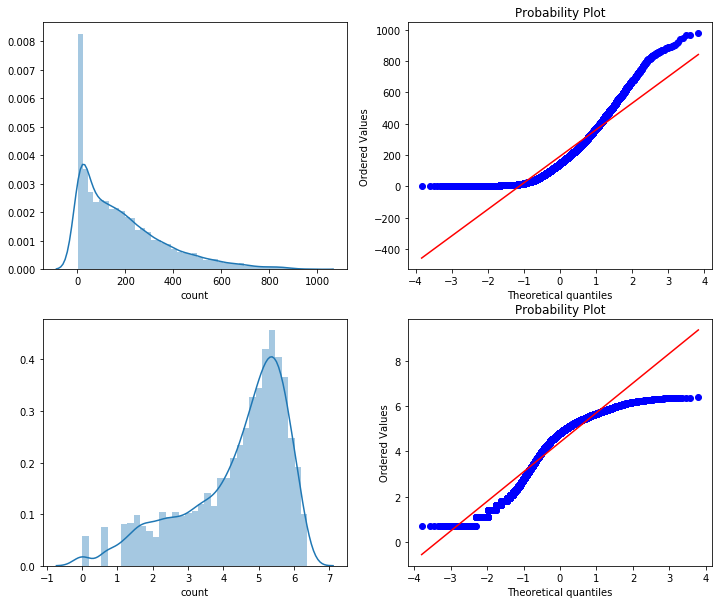

In [57]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sns.distplot(dataset["count"],ax=axes[0][0])
stats.probplot(dataset["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(train_without_outliers ["count"]),ax=axes[1][0])
stats.probplot(np.log1p(train_without_outliers ["count"]), dist='norm', fit=True, plot=axes[1][1])

### We are going to fill the row that wind speed is equal zero.

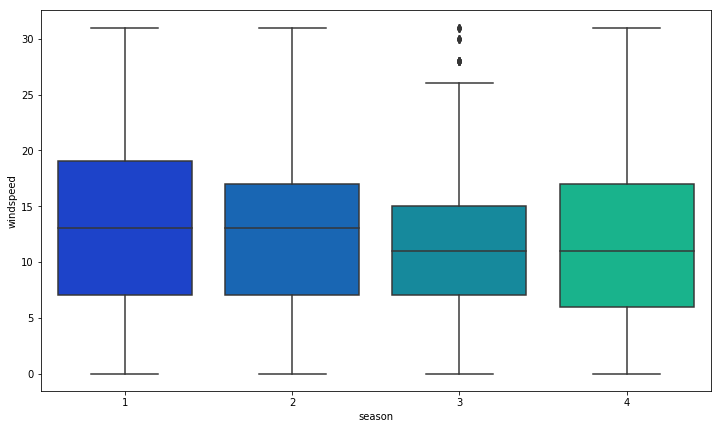

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='season',y='windspeed',data=train_without_outliers,palette='winter')

In [24]:
def wind(cols):
    windspeed = cols[0]
    season = cols[1]
    
    if windspeed==0:

        if season == 1 :
            return 14

        elif season == 2 :
            return 14

        else:
            return 13

    else:
        return windspeed

Now, We are going to apply that function.

In [25]:
train_without_outliers['wind'] = train_without_outliers[['windspeed','season']].apply(wind,axis=1)

In [26]:
dataset.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5,0,52
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0,1,5,1,52
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0,1,5,2,52


In [27]:
train_without_outliers.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,wind
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5,0,52,14.0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0,1,5,1,52,14.0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0,1,5,2,52,14.0


###  Converting the Categorical Data into Categorical Colummns

In [28]:
train_without_outliers[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']] = train_without_outliers[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']].astype('category')

In [29]:
 train_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9263 entries, 0 to 10885
Data columns (total 17 columns):
season        9263 non-null category
holiday       9263 non-null category
workingday    9263 non-null category
weather       9263 non-null category
temp          9263 non-null float64
atemp         9263 non-null float64
humidity      9263 non-null int64
windspeed     9263 non-null float64
casual        9263 non-null int64
registered    9263 non-null int64
count         9263 non-null int64
year          9263 non-null category
month         9263 non-null category
day           9263 non-null category
hour          9263 non-null category
dayofweek     9263 non-null category
wind          9263 non-null float64
dtypes: category(9), float64(4), int64(4)
memory usage: 1.0 MB


#### We Can Now start making the Predictions

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = train_without_outliers[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','wind']]
y = train_without_outliers['count']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

#### Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 5000,random_state= 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
rf_prediction = rf.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, rf_prediction))

('MSE:', 928.4634920616612)


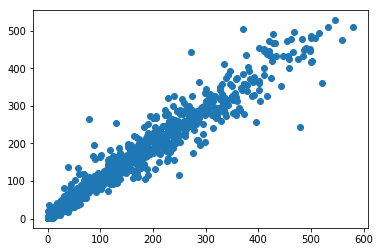

In [64]:
plt.scatter(y_test,rf_prediction)

####  Decision Tree Regression

In [38]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_prediction = dt_reg.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, dt_prediction))

('MSE:', 2374.542610571737)


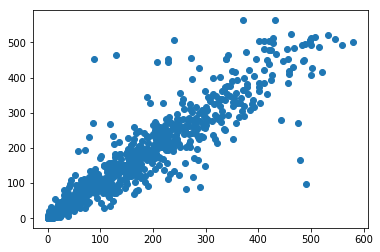

In [39]:
plt.scatter(y_test,dt_prediction)

#### Now, We will use the test data

In [ ]:
test_pred= rf.predict(test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','wind']])

In [ ]:
test_pred = pd.DataFrame(test_pred, columns=['count'])

In [ ]:
df = pd.concat([test, test_pred],axis=1)

In [ ]:
df = df[['datetime','count']]

In [ ]:
df['count'] = df['count'].astype('int')

In [ ]:
df.to_csv('submission.csv' , index=False)
df.head()

## Advanced Modelling

In [42]:
cont_names=['temp','atemp','humidity','windspeed']

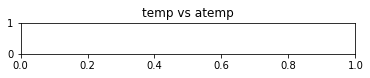

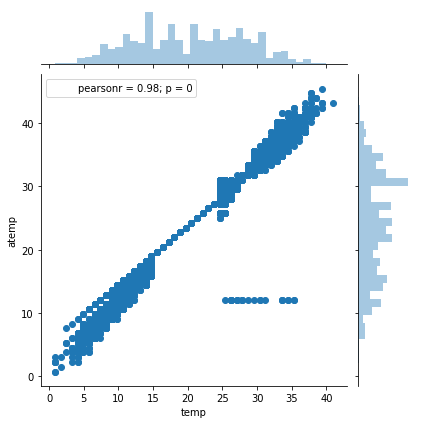

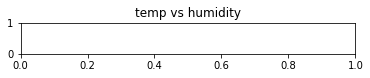

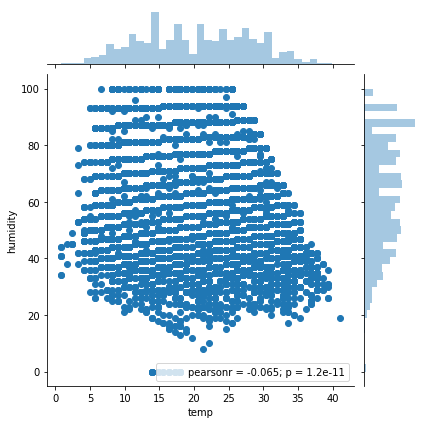

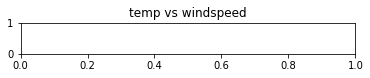

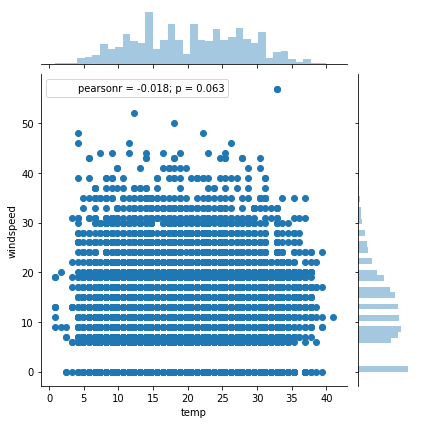

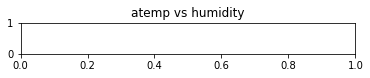

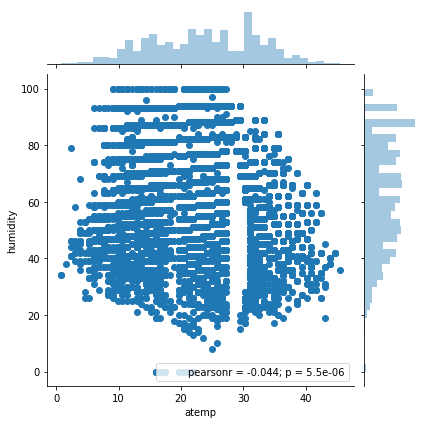

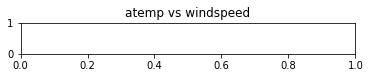

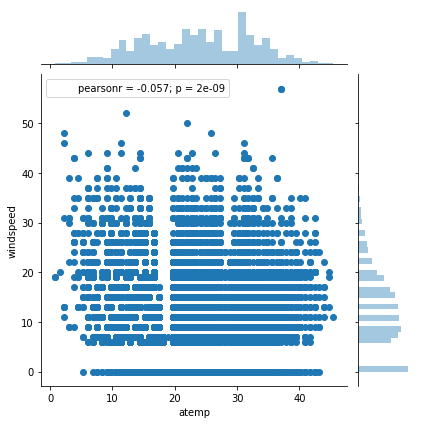

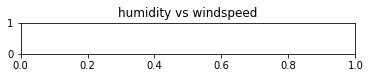

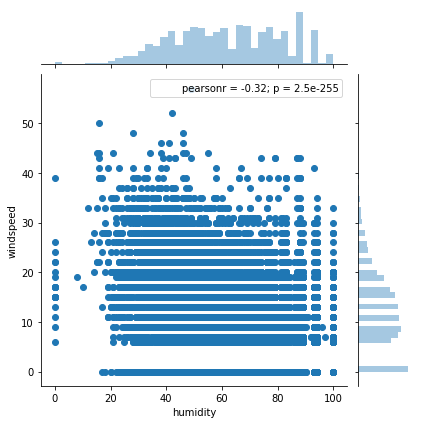

In [43]:
i=1
for name_1 in cont_names:
    j=cont_names.index(name_1)


    while(j<len(cont_names)-1):


        plt.subplot(6,1,i)
        plt.title(name_1+' vs '+cont_names[j+1])
        sns.jointplot(x=name_1,y=cont_names[j+1],data=dataset) 
        j=j+1
        i=i+1
        plt.show()
            

Not much can be inferred about the distribution of these variables except for variable 'temp' and 'atemp' that almost have similar context. We would be using the 'temp' and getting rid of the 'atemp' variables for better precision value and avoiding multi-collinearity.

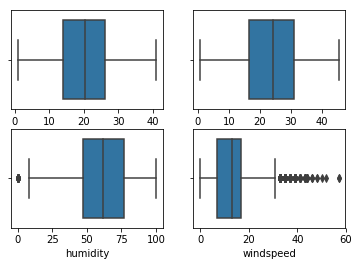

In [44]:
cont_names=['temp','atemp','humidity','windspeed']

        
#sns.boxplot(train_df['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=dataset) 
    
plt.show()

Some of the inferences that can be made:

Holiday and working day look somewhat correlated. Can one of them be removed to avoid multi-collinearity?Let's wait until we calculate thier correlation value

Not much can be inferred from season data. Majority of the data fall under 1 and 2, which is clear skies mist/cloudy.
Temp, Atemp, humidity look normally distributed. However, windspeed has a lot of outliers which will be analysed further.

doing a brief time-series analysis to see if there's any improvement in count over a period of time

moving average to be calculated for a period of 3/4 months as that is the no of months in one season

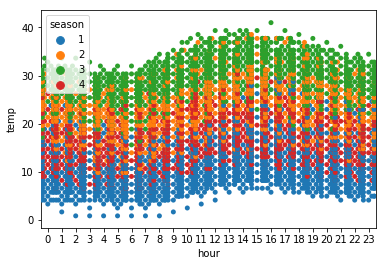

In [46]:
sns.swarmplot(x='hour',y='temp',data=dataset,hue='season')
plt.show()

A non-linear relationship between temperature and day of the hour according to different seasons is evident from this chart. Feature engineering to create bins on an hourly basis.

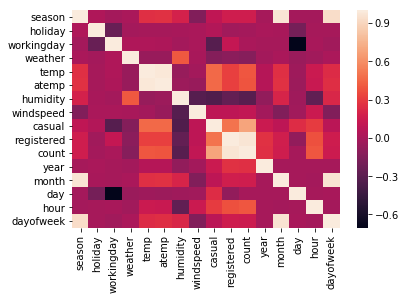

In [48]:
dataset.cov()
sns.heatmap(dataset.corr())
plt.show()

A lot of inferences that we have already covered could be verified using the following heatmap

In [49]:
dataset.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,-0.010553,-0.006546,0.939284
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.191832,-0.000354,0.000976
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,-0.704267,0.002780,-0.022593
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.047692,-0.022740,0.019762
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,-0.038466,0.145430,0.240794
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,-0.040235,0.140343,0.248653
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.026507,-0.278011,0.216435
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,-0.024804,0.146631,-0.145962
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.246959,0.302045,0.079906
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,-0.084427,0.380540,0.156480


A lot of inferences that we have already hypothesised could be verified using the following heatmap and correlation matrix.

#### Visualizing multi-variate distribution of target variable with other categorical data

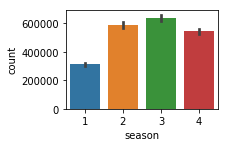

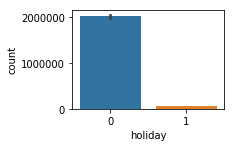

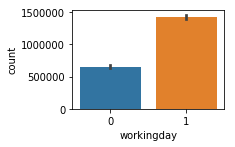

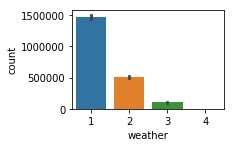

In [50]:
cat_names=['season', 'holiday', 'workingday', 'weather']
i=1
for name in cat_names:
    plt.subplot(2,2,i)
    sns.barplot(x=name,y='count',data=dataset,estimator=sum)
    i=i+1
    plt.show()

With weather 1,2 and season 2,3 and working days the bicycle rental count is maximum.

As per the analysis, we need to get rid off these variables to be inputted in our model:season. Working day has better 
correlation with count, weather,working day, hour,year has to be label encoded